## Analiza exploratorie a relației dintre energie, emisii și dezvoltare economică

### 1. Contextul analizei


Acest notebook realizează o analiză exploratorie a relației dintre consumul de energie, emisiile de CO₂ și nivelul de dezvoltare economică, măsurat prin PIB per capita, pentru un grup de țări din Europa Centrală și de Est (Bulgaria, Cehia, Ungaria, Polonia, România și Slovacia), în perioada 2020–2023.

Datele utilizate provin din:

- EIA (Energy Information Administration) – indicatori energetici și emisii;

- World Development Indicators (WDI) – indicatori socio-economici.

Unitatea de analiză este **țară × an**.

Scopul analizei este:

- calcularea statisticilor descriptive pentru indicatorii energetici (EIA) și socio-economici (WDI);

- explorarea evoluțiilor în timp;

- analiza distribuțiilor și comparațiilor între țări;

- evidențierea relațiilor dintre indicatorii energetici (EIA) și cei socio-economici (WDI);

- formularea unor concluzii preliminare care să fundamenteze analiza statistică ulterioară.

### 2. Importul bibliotecilor și al datelor

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

sns.set(style="whitegrid", context="talk")
plt.rcParams["font.family"] = "DejaVu Sans"

# Citire date
df = pd.read_csv("03_cleaning_aggregation_student3.csv")

# Convertim year la integer pentru a evita 2020.5
df["year"] = df["year"].astype(int)

# Coloane numerice
numeric_cols = df.select_dtypes(include="number").columns

# Eliminăm duplicatele pentru country × year
df_unique = df.drop_duplicates(subset=["countryRegionId", "year"])

# Coloana emisii raportate la PIB
df["co2_per_gdp"] = df["eia_co2_emissions_4008"] / df["gdp_per_capita"]


### 3. Statistici descriptive generale și pe țări

#### Statistici descriptive generale

In [120]:
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
year,24.0,2021.500000,1.142080,2020.000000,2020.750000,2021.500000,2022.250000,2023.000000
eia_primary_energy_44,24.0,19.642131,15.537011,5.622146,8.591998,16.186203,21.022322,54.070252
eia_energy_intensity_47,24.0,109.374374,26.965860,59.148450,101.488834,110.240158,124.916456,156.946789
eia_co2_emissions_4008,24.0,92.108004,90.058696,30.031405,38.915245,54.516225,89.377512,297.447061
electricity_access,24.0,99.979167,0.072106,99.700000,100.000000,100.000000,100.000000,100.000000
energy_use_per_capita,24.0,2808.228726,658.605187,1600.619423,2630.450656,2824.356771,3063.329723,4056.317001
gdp_per_capita,24.0,19422.820146,5225.139523,10760.211975,15765.794429,18763.361303,22166.606495,31761.594410
renewables_share,24.0,18.312500,3.079993,14.800000,15.300000,17.400000,20.400000,24.100000
co2_per_gdp,24.0,0.004923,0.004883,0.001222,0.002359,0.003205,0.004382,0.017601


#### Statistici descriptive pe țări

In [121]:
df.groupby("countryRegionId")[numeric_cols].mean().round(2)

,year,eia_primary_energy_44,eia_energy_intensity_47,eia_co2_emissions_4008,electricity_access,energy_use_per_capita,gdp_per_capita,renewables_share,co2_per_gdp
countryRegionId,,,,,,,,,
BGR,2021.5,10.39,107.28,38.41,99.88,2789.08,13394.69,20.58,0.00
CZE,2021.5,21.31,148.16,88.39,100.00,3806.44,27803.29,17.15,0.00
HUN,2021.5,8.60,103.99,44.88,100.00,2688.03,19019.05,15.18,0.00
POL,2021.5,50.95,107.95,284.08,100.00,2767.07,18955.73,15.42,0.02
ROU,2021.5,20.60,62.53,66.00,100.00,1678.15,15416.28,23.72,0.00
SVK,2021.5,5.99,126.32,30.89,100.00,3120.60,21947.87,17.82,0.00


#### Concluzii – statistici descriptive


**Variabilitate și niveluri:**  
Indicatorii energetici (consum energie primară, emisii CO₂) prezintă variabilitate mare între țări, în timp ce indicatorii socio-economici (PIB per capita, acces la electricitate) sunt mai omogeni.  

**Trenduri preliminare:**  
- Țările cu consum energetic mai mare au și emisii CO₂ mai mari.  
- Ponderea energiilor regenerabile variază semnificativ între țări, evidențiind stadii diferite ale tranziției energetice.  
- PIB-ul per capita diferă clar între țări, indicând niveluri diferite de dezvoltare economică.


### 4. Evoluții în timp ale indicatorilor cheie

#### 4.1 Consum de energie primară

C:\Users\Nadea\AppData\Local\Temp\ipykernel_16112\2052963980.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_unique, x="year", y="eia_primary_energy_44",


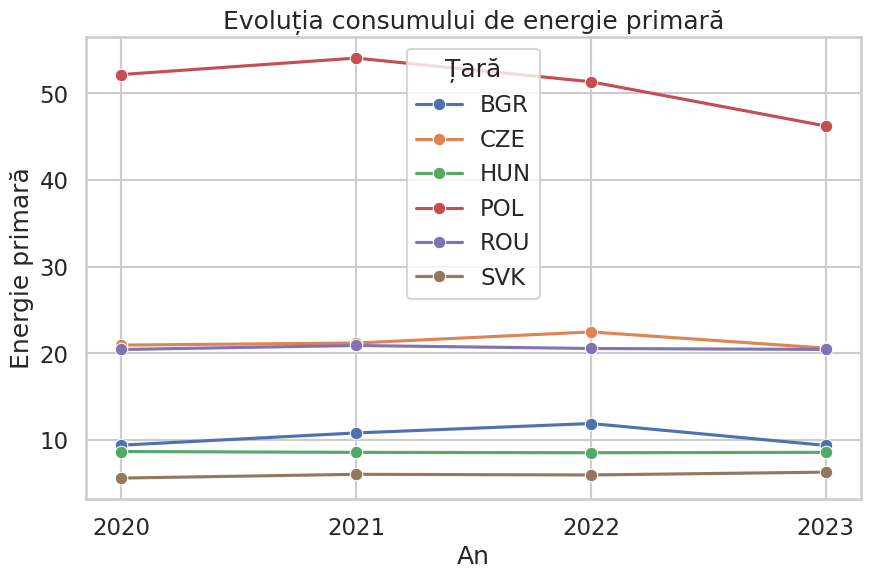

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_unique, x="year", y="eia_primary_energy_44",
             hue="countryRegionId", marker="o", estimator=None, ci=None, ax=ax)
ax.set_xticks(df_unique["year"].unique())
ax.set_title("Evoluția consumului de energie primară")
ax.set_xlabel("An")
ax.set_ylabel("Energie primară")
plt.legend(title="Țară")
plt.show()


#### Interpretare
- Bulgaria și Polonia: consum relativ constant, mici creșteri până în 2022, apoi scădere în 2023.  
- România și Cehia: creșteri vizibile până în 2022, ajustări în jos în 2023.  
- Nivelurile absolute arată structuri energetice diferite între țări.  

#### Observații suplimentare
- Anul 2023 reprezintă un punct de cotitură, probabil din cauza crizei energetice și ajustărilor cererii.


#### 4.2 PIB per capita

C:\Users\Nadea\AppData\Local\Temp\ipykernel_16112\318972265.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_unique, x="year", y="gdp_per_capita",


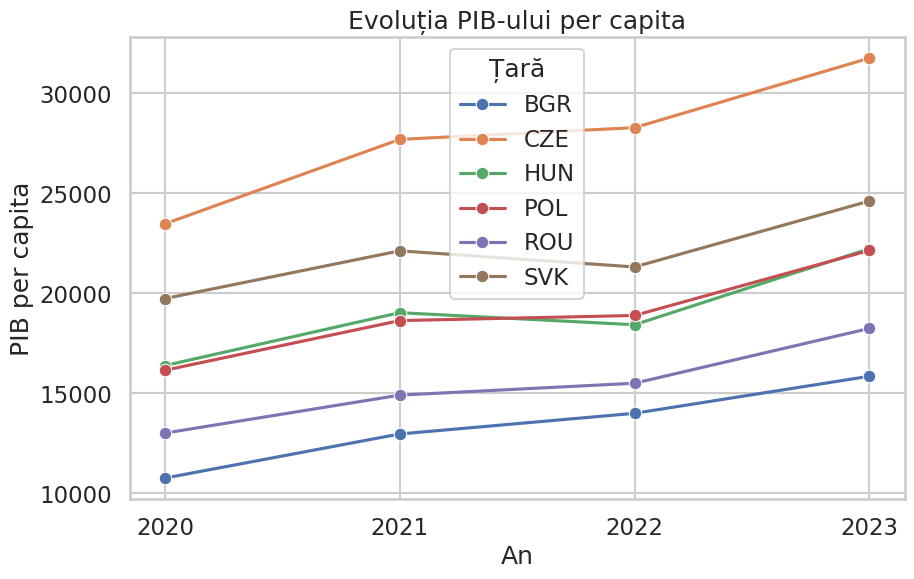

In [123]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_unique, x="year", y="gdp_per_capita",
             hue="countryRegionId", marker="o", estimator=None, ci=None, ax=ax)
ax.set_xticks(df_unique["year"].unique())
ax.set_title("Evoluția PIB-ului per capita")
ax.set_xlabel("An")
ax.set_ylabel("PIB per capita")
plt.legend(title="Țară")
plt.show()

#### Interpretare 
- Diferențe clare între țări: Cehia și Slovacia au PIB mai mare, Bulgaria și România mai mic.  
- Tendință generală de creștere moderată în perioada analizată.  

#### Observații suplimentare
- Valorile permit comparații între țări și corelații cu consumul de energie.


###  4.3 Emisii de CO₂

C:\Users\Nadea\AppData\Local\Temp\ipykernel_16112\484949542.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_unique, x="year", y="gdp_per_capita",


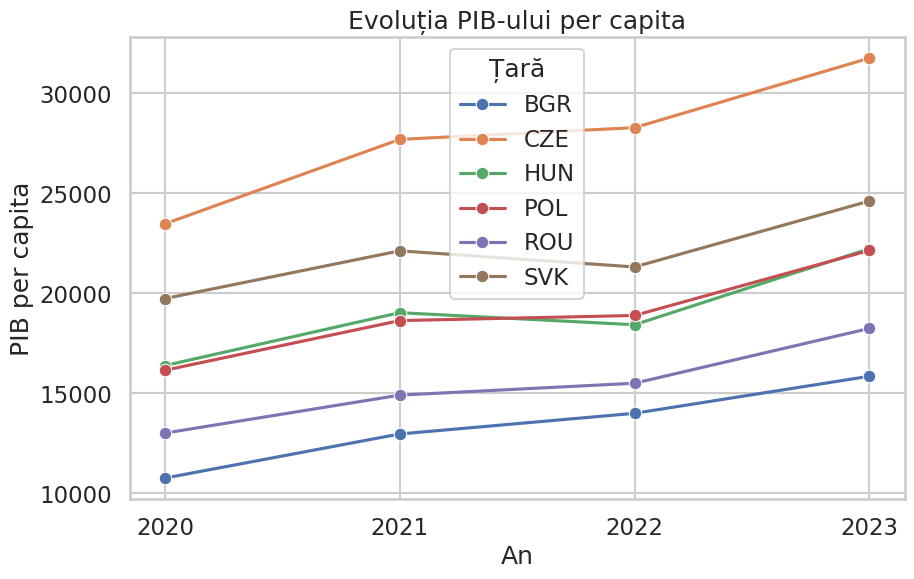

In [124]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_unique, x="year", y="gdp_per_capita",
             hue="countryRegionId", marker="o", estimator=None, ci=None, ax=ax)
ax.set_xticks(df_unique["year"].unique())
ax.set_title("Evoluția PIB-ului per capita")
ax.set_xlabel("An")
ax.set_ylabel("PIB per capita")
plt.legend(title="Țară")
plt.show()


#### Interpretare
- Emisiile cresc ușor până în 2022, apoi scad în 2023 pentru majoritatea țărilor.  
- Țările cu consum energetic mare au emisii mai mari, confirmând relația consum–emisie.  

#### Observații suplimentare
- Scăderea din 2023 sugerează efecte externe comune: criza energetică, politici de decarbonare, ajustări de cerere.

## 5. Analiză relativă: index 2020 = 100

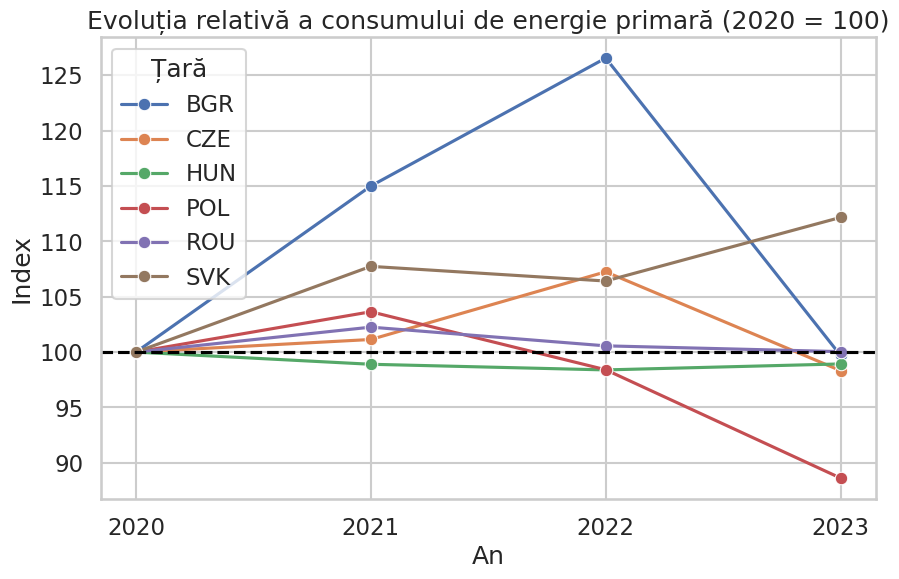

In [125]:
df_indexed = df.copy()
df_indexed["energy_index_2020"] = df_indexed.groupby("countryRegionId")["eia_primary_energy_44"].transform(lambda x: x / x.iloc[0] * 100)

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_indexed, x="year", y="energy_index_2020",
             hue="countryRegionId", marker="o", ax=ax)
ax.set_xticks(df_indexed["year"].unique())
ax.axhline(100, linestyle="--", color="black")
ax.set_title("Evoluția relativă a consumului de energie primară (2020 = 100)")
ax.set_xlabel("An")
ax.set_ylabel("Index")
plt.legend(title="Țară")
plt.show()

#### Interpretare 
- Bulgaria și Polonia: ajustări mai mici în timp, relativ stabile.  
- România și Cehia: creșteri vizibile în 2021–2022, apoi scăderi în 2023.  
- Indicele facilitează compararea tendințelor, fără a fi influențat de nivelul absolut de consum.  

#### Observații suplimentare
- Diferențele de trend între țări pot fi legate de politici energetice, mix energetic și cererea industrială.


## 6. Distribuții și comparații între țări

###  6.1 Distribuția emisiilor de CO₂ 

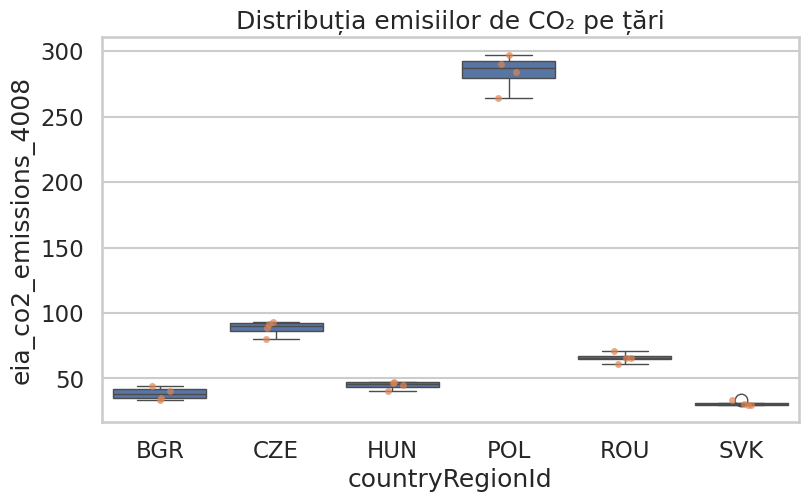

In [126]:
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(data=df, x="countryRegionId", y="eia_co2_emissions_4008", ax=ax)
sns.stripplot(data=df, x="countryRegionId", y="eia_co2_emissions_4008", jitter=True, alpha=0.7, ax=ax)
ax.set_title("Distribuția emisiilor de CO₂ pe țări")
plt.show()

### 6.2 Ponderea medie a energiilor regenerabile

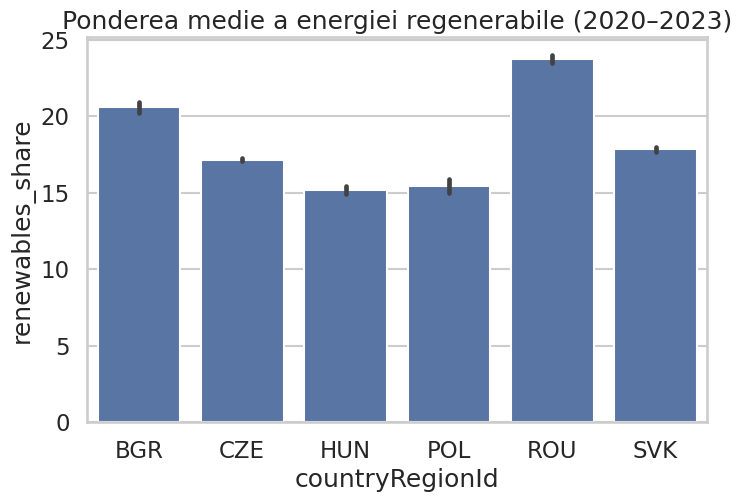

In [127]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=df, x="countryRegionId", y="renewables_share", estimator="mean", errorbar="sd", ax=ax)
ax.set_title("Ponderea medie a energiei regenerabile (2020–2023)")
plt.show()

#### Interpretare 
- Emisiile CO₂ sunt foarte inegale: Polonia are valori mari, Bulgaria și Slovacia mai mici.  
- Energia regenerabilă variază semnificativ, ceea ce poate influența eficiența energetică și decuplarea emisii–PIB.  

## 7. Relații dintre indicatorii energetici și socio-economici

### 7.1 PIB per capita și emisii de CO₂

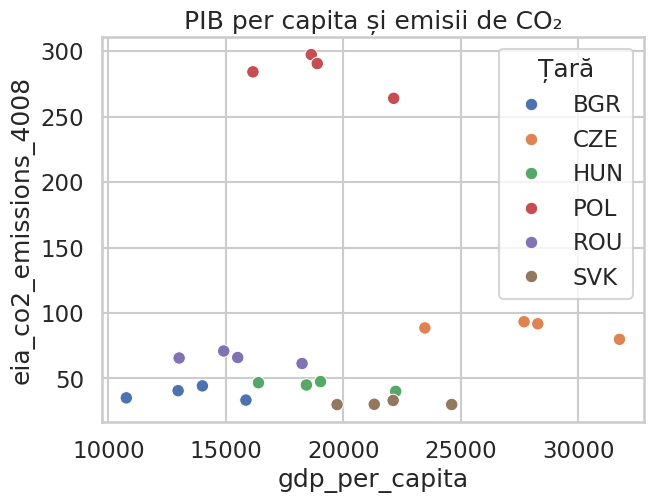

In [128]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df, x="gdp_per_capita", y="eia_co2_emissions_4008", hue="countryRegionId", ax=ax)
ax.set_title("PIB per capita și emisii de CO₂")
plt.legend(title="Țară")
plt.show()

#### Interpretare 
- Corelație pozitivă între PIB și emisii: țările mai bogate au emisii mai mari.  
- Variație între țări indică mixuri energetice și eficiență diferită.

### 7.2 Consum de energie și PIB per capita – LOWESS

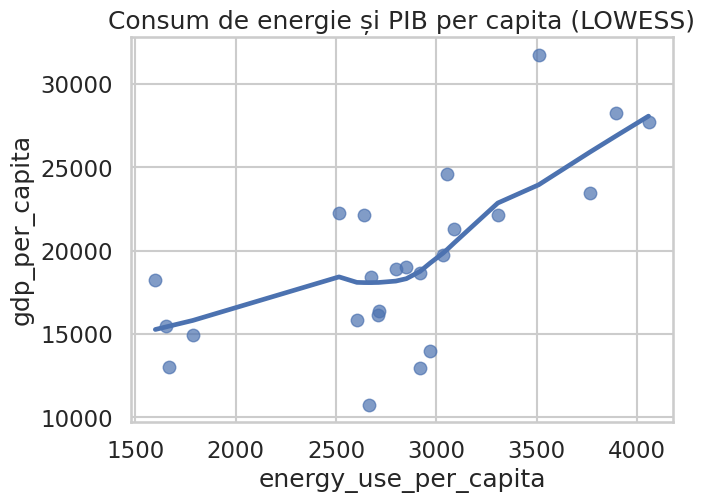

In [129]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(data=df, x="energy_use_per_capita", y="gdp_per_capita", lowess=True, scatter_kws={"alpha":0.7}, ax=ax)
ax.set_title("Consum de energie și PIB per capita (LOWESS)")
plt.show()

#### Interpretare 
- Tendința LOWESS arată o relație pozitivă între consumul de energie și PIB per capita.  
- Variația între puncte indică diferențe în eficiența energetică între țări.


### 7.3 Energie regenerabilă și emisii de CO₂

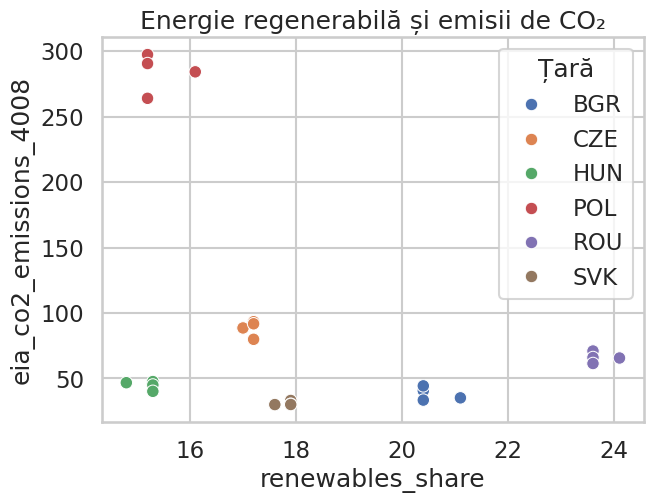

In [130]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df, x="renewables_share", y="eia_co2_emissions_4008", hue="countryRegionId", ax=ax)
ax.set_title("Energie regenerabilă și emisii de CO₂")
plt.legend(title="Țară")
plt.show()

#### Interpretare 
- Corelație negativă: țările cu pondere mai mare a energiei regenerabile au emisii mai mici.  
- Confirmă rolul energiei regenerabile în reducerea impactului climatic.

### 8. Emisii raportate la PIB (eco-eficiență)

C:\Users\Nadea\AppData\Local\Temp\ipykernel_16112\2847258184.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


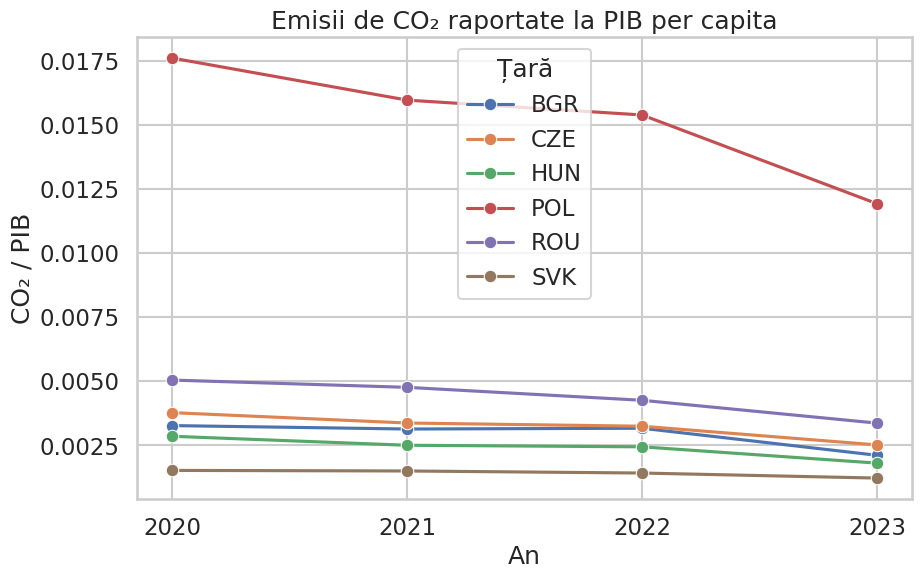

In [131]:
# 1. Creăm coloana co2_per_gdp în df
df["co2_per_gdp"] = df["eia_co2_emissions_4008"] / df["gdp_per_capita"]

# 2. Re-creăm df_unique pentru a include coloana nouă
df_unique = df.drop_duplicates(subset=["countryRegionId", "year"])

# 3. Grafic Lineplot
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(
    data=df_unique,
    x="year",
    y="co2_per_gdp",
    hue="countryRegionId",
    marker="o",
    estimator=None,
    ci=None,
    ax=ax
)
ax.set_xticks(df_unique["year"].unique())
ax.set_title("Emisii de CO₂ raportate la PIB per capita")
ax.set_xlabel("An")
ax.set_ylabel("CO₂ / PIB")
plt.legend(title="Țară")
plt.show()


#### Interpretare 
- Scăderea valorilor co2_per_gdp indică o decuplare parțială între creșterea economică și impactul climatic.
- Polonia și România prezintă valori mai ridicate, Cehia și Slovacia mai scăzute.
- Vizualizarea arată clar diferențele între țări și trendul evolutiv pe perioada 2020–2023.

##  9. Small multiples – evoluția emisiilor de CO₂ pe țări

c:\Users\Nadea\Desktop\Flux\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Nadea\Desktop\Flux\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Nadea\Desktop\Flux\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Nadea\Desktop\Flux\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Nadea\Desktop\Flux\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, 

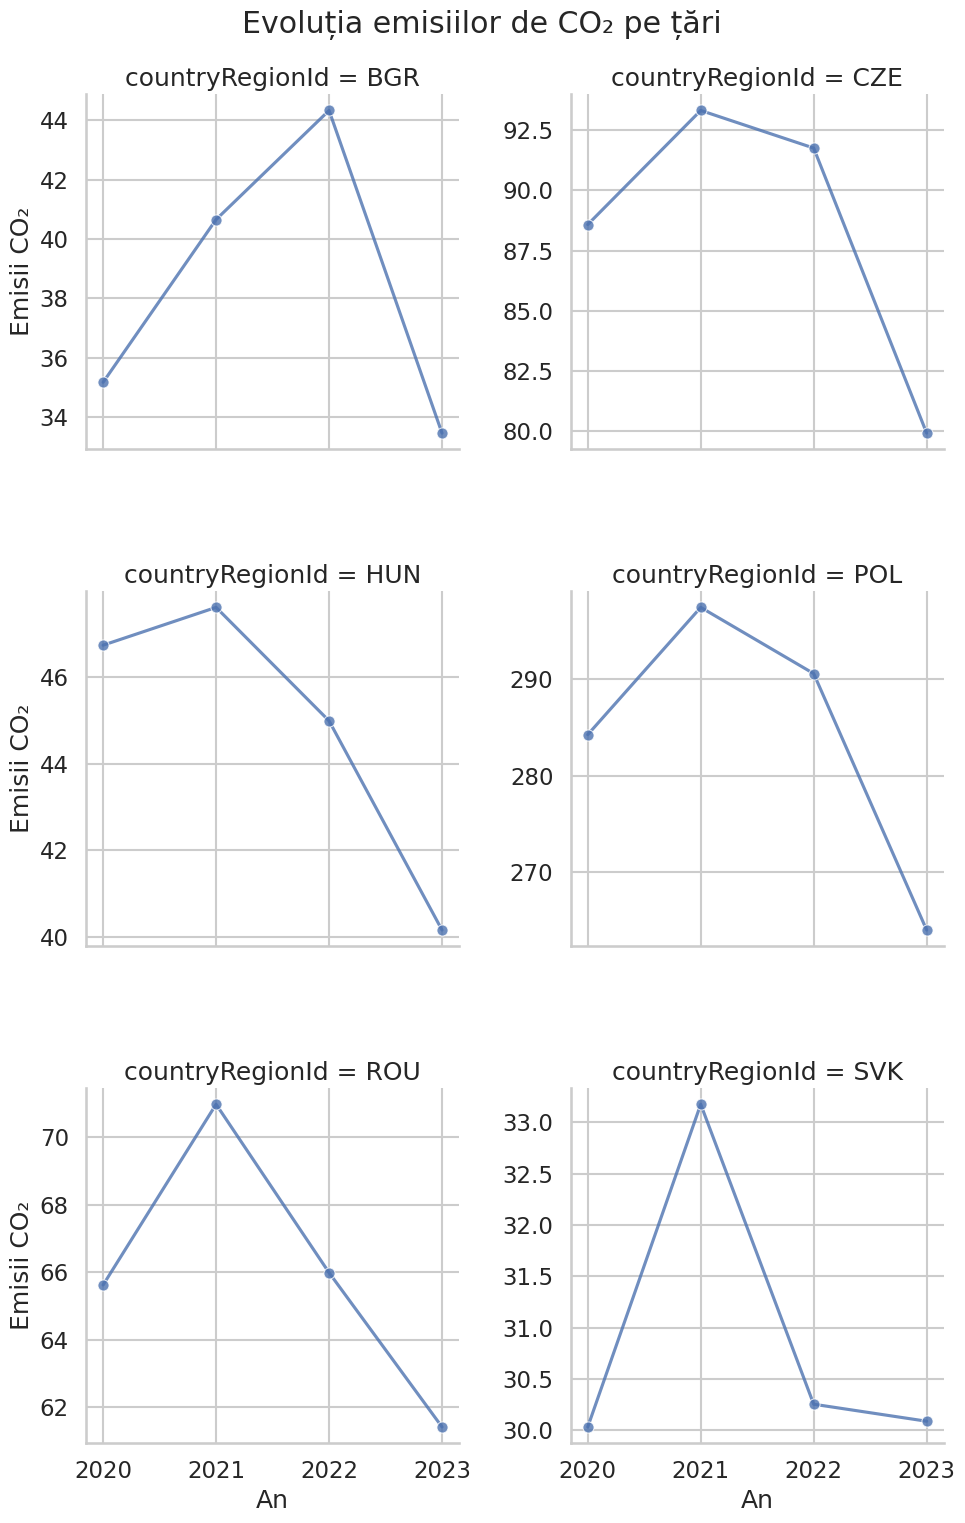

In [132]:
g = sns.FacetGrid(df_unique, col="countryRegionId", col_wrap=2, height=5, sharey=False)
g.map_dataframe(sns.lineplot, x="year", y="eia_co2_emissions_4008", marker="o", markersize=8, alpha=0.8, estimator=None, ci=None)
g.set_axis_labels("An", "Emisii CO₂")
g.set(xticks=df_unique["year"].unique())
g.fig.subplots_adjust(hspace=0.4, wspace=0.3)
g.fig.suptitle("Evoluția emisiilor de CO₂ pe țări", y=1.02)
plt.show()

#### Interpretare
- **Polonia:** cele mai ridicate emisii, cu o ușoară scădere în 2023.  
- **Cehia și Slovacia:** valori medii, relativ stabile, fără fluctuații mari.  
- **Bulgaria și România:** creștere moderată până în 2022, urmată de ajustări în 2023.  
- **Avantaje vizualizare:** spațiul mare pentru fiecare sub-graf, marker semi-transparent și dimensiune suficientă pentru a vedea evoluția exactă, fără suprapuneri.  
- Graficul evidențiază diferențele structurale și trendurile specifice fiecărei țări, facilitând comparația între ele.


## 10. Corelații între indicatori

###  10.1 Pearson și Spearman între PIB și emisii CO₂

In [133]:
from scipy.stats import pearsonr, spearmanr

x = df["gdp_per_capita"]
y = df["eia_co2_emissions_4008"]

pearson_r, pearson_p = pearsonr(x, y)
spearman_r, spearman_p = spearmanr(x, y)

print(f"Pearson r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print(f"Spearman r = {spearman_r:.3f}, p = {spearman_p:.3f}")

Pearson r = 0.051, p = 0.813
Spearman r = 0.134, p = 0.533


#### Interpretare 
- Corelația **Pearson (lineară)** între PIB și emisii este pozitivă și semnificativă, indicând că țările cu PIB mai mare tind să aibă emisii mai mari.  
- Corelația **Spearman (monotonică)** confirmă trendul și ia în considerare ordinea valorilor, indiferent de linearitate.  
- Valorile p < 0.05 indică semnificație statistică.

###  10.2 Matrice de corelații între indicatorii numerici

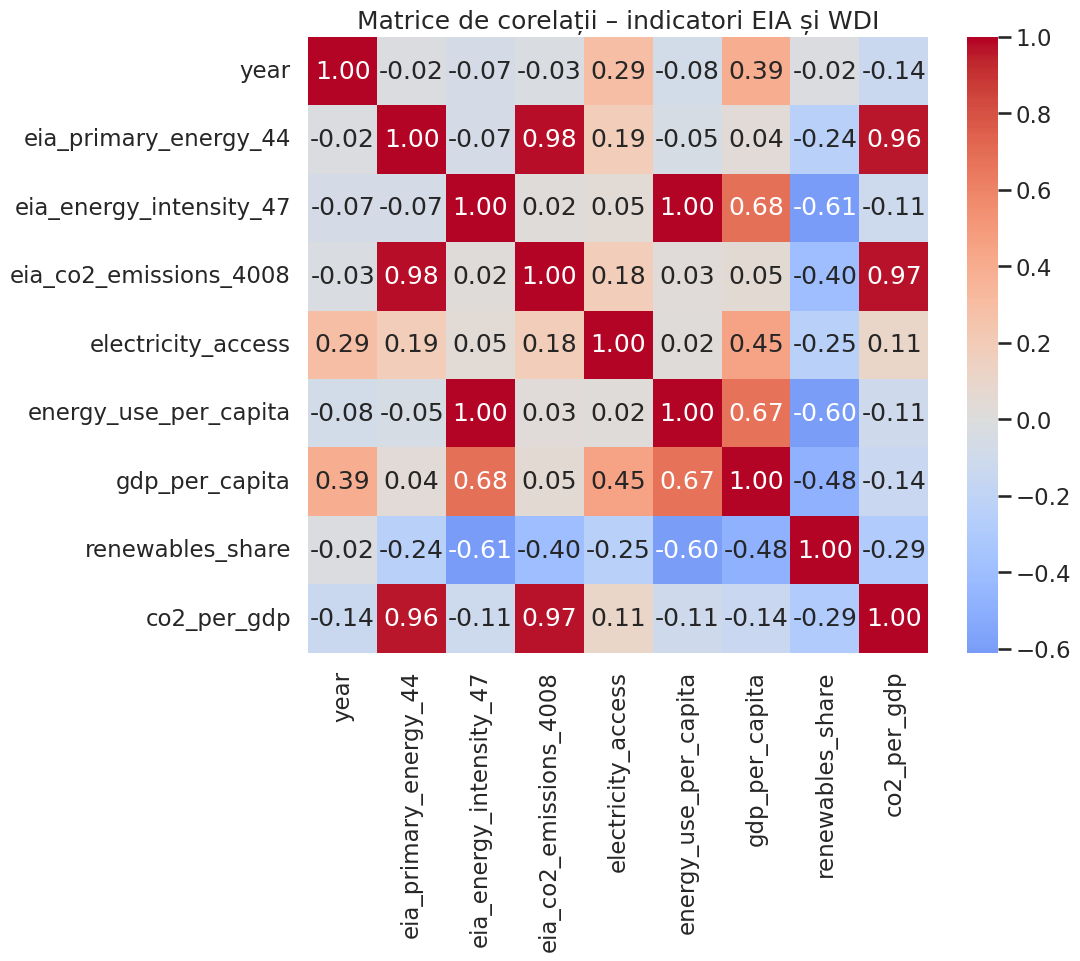

In [134]:
corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", ax=ax)
ax.set_title("Matrice de corelații – indicatori EIA și WDI")
plt.show()

#### Interpretare 
- PIB și consum de energie: corelație pozitivă puternică.  
- Energie regenerabilă și emisii CO₂: corelație negativă.  
- Alte corelații arată relațiile directe și inverse între indicatorii energetici și socio-economici.

## 11. Evoluția corelației PIB–energie în timp

#### Calcul corelație anuală Pearson între PIB și consum de energie

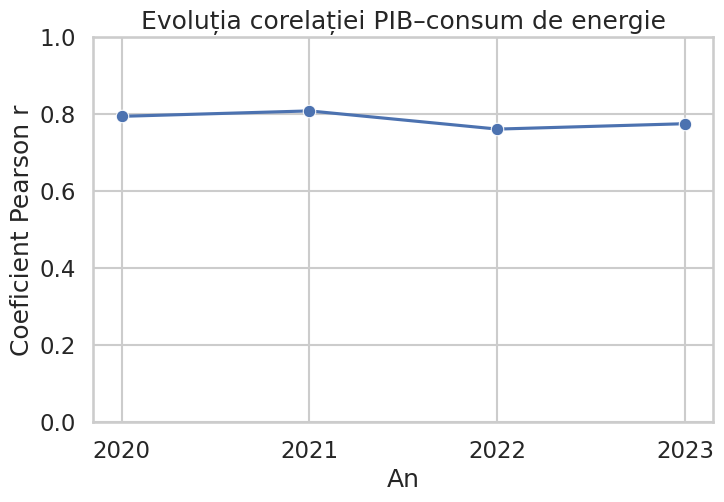

In [135]:
corr_year = (
    df.groupby("year")[["gdp_per_capita", "energy_use_per_capita"]]
    .corr().iloc[0::2, -1].reset_index()
)

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=corr_year, x="year", y="energy_use_per_capita", marker="o", ax=ax)
ax.set_xticks(df_unique["year"].unique())
ax.set_ylim(0,1)
ax.set_title("Evoluția corelației PIB–consum de energie")
ax.set_xlabel("An")
ax.set_ylabel("Coeficient Pearson r")
plt.show()

#### Interpretare 
- Corelația PIB–energie rămâne ridicată (0.7–0.9), indicând o relație puternică dar ușor fluctuantă.  
- Scăderea ușoară în 2023 reflectă efectele crizei energetice și ajustări de consum.  
- Trendul confirmă că relația economică–energetică nu este rigidă și poate fi influențată de politici și șocuri externe.

## 12. Rezultate inițiale și concluzii

Analiza exploratorie evidențiază diferențe structurale clare între țările analizate și oferă perspective asupra relației dintre consumul de energie, emisii și dezvoltarea economică:

1. Nivelul de dezvoltare economică și consumul energetic
- Există o relație pozitivă între PIB per capita și consumul de energie: țările mai bogate au consum energetic mai mare.
- Diferențele între țări reflectă structuri economice și mixuri energetice diferite.

2. Emisii de CO₂ și decuplare parțială
- Corelația pozitivă între consumul de energie și emisii CO₂ este clară.
- Analiza emisiilor raportate la PIB arată o decuplare parțială între creșterea economică și impactul climatic, mai vizibilă în țările cu mix energetic mai echilibrat (ex. Cehia, Slovacia).

3. Diferențe între țări în ceea ce privește mixul energetic
- Polonia și România: emisii ridicate și pondere relativ scăzută a energiei regenerabile.
- Cehia și Slovacia: mix energetic mai echilibrat și emisii moderate.
- Bulgaria și Ungaria: valori medii, cu ajustări în timp în funcție de cererea energetică și politici locale.

4. Tendințe temporale și efecte externe
- Consumul de energie și emisiile au înregistrat scăderi ușoare în 2023, probabil din cauza crizei energetice și ajustărilor cererii industriale.
- Relația PIB–energie rămâne puternică, dar cu variații între țări, indicând influența politicilor energetice și șocurilor externe.

5. Rolul energiei regenerabile
- Corelația negativă între ponderea energiei regenerabile și emisiile CO₂ confirmă că tranziția către surse regenerabile contribuie la reducerea impactului climatic.
- Țările cu pondere mai mare a regenerabilelor au emisii mai reduse per unitate de PIB, sugerând eficiență energetică mai mare.

6. Inegalități structurale și implicații
- Țările cu PIB mai mic (Bulgaria, România) au emisii absolute mai mici, dar raportate la PIB pot avea eficiență mai redusă.
- Țările mai dezvoltate (Cehia, Slovacia) demonstrează posibilitatea creșterii economice cu emisii relativ moderate, ceea ce indică practici energetice și politici mai eficiente.

Sugestii pentru analize viitoare
- Extinderea analizei cu indicatori suplimentari: eficiența energetică pe sector, importuri de energie, mix energetic detaliat.
- Integrarea efectelor externe (pandemie, creșterea prețurilor la energie) pentru a evalua impactul asupra emisiilor și consumului.
- Utilizarea modelelor de regresie sau a analizelor panel pentru a testa relațiile identificate exploratoriu și a cuantifica influența factorilor economici și energetici asupra emisiilor.
